# 서울시 범죄 현황 데이터 분석

---
## 1. 데이터 준비
- taeheon/eda_study/data/data02/02. crime_in_Seoul.csv

---
## 2. 데이터 개요 및 읽어오기

### 데이터 읽어오기
- thousands=','로 읽어오면 원본 데이터의 콤마를 제거하고 숫자형으로 읽어온다.

In [214]:
import pandas as pd
import numpy as np

crime_raw_data = pd.read_csv('../data/data02/02. crime_in_Seoul.csv', 
                             thousands=',', 
                             encoding='euc-kr')

crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


- 구분 : 서울시 각 구의 경찰서 (예 : 중부 = 서울시중부경찰서)
- 죄종 : 살인, 강도, 강간, 절도, 폭력
- 발생검거 : 검거한 범죄 = 검거
- 건수 : 횟수

In [58]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


### NaN 데이터 파악하기 
- 데이터의 Non-Null Count는 310개이고, index는 65534개이다.
- '죄종'컬럼에서 unique한 값만 추출해보자

In [59]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간', '절도', '폭력', nan], dtype=object)

- '죄종' 컬럼에 nan이 있다.
- '죄종' 컬럼 중에서 NaN값을 갖는 행을 추출해보자

In [60]:
crime_raw_data[crime_raw_data['죄종'].isnull()]

,구분,죄종,발생검거,건수
310,NaN,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN
312,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN
...,...,...,...,...
65529,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN


- 310행부터 65533행까지 모두 NaN 데이터를 갖는 것을 알 수 있다
- NaN값을 갖는 행을 없애는 것이 아닌, NaN이 아닌 데이터만 가져와 새로운 변수에 할당해보자

In [61]:
crime_raw_data = crime_raw_data[crime_raw_data['죄종'].notnull()]

crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.1+ KB


In [62]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


- 원하는 데이터는 구별 각 범죄에 대한 발생 및 검거 횟수 데이터이다.
- 읽어온 데이터는 각 구에서 발생한 모든 범죄에 대한 데이터가 각각 나열되어 있기에(경찰서 이름이 중복되어 있음), 이를 정리해줄 필요가 있다.

---
## 3. 데이터 pivot

### pivot_table을 활용한 데이터 정리
- pandas의 pivot_table 메서드를 활용하여 crime_raw_data를 구별 범죄 데이터로 정리해보자

In [63]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [215]:
crime_station = crime_raw_data.pivot_table(crime_raw_data, 
                                           index=['구분'], 
                                           columns=['죄종', '발생검거'], 
                                           aggfunc=[np.sum])

crime_station.head()

sum                                                              
         건수                                                              
죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

- pivot_table 결과, index는 서울시 각 구의 경찰서, columns는 '죄종', '발생검거' 값이 np.sum을 통해 모든 건수에 대해서 더해졌다.
- 즉 강남구 경찰서에서 발생한 강간 범죄에 대한 검거 및 발생 총 건수, 강도 범죄에 대한 검거 및 발생 총 건수..의 형태로 보기 좋게 정리되었다. 

### multiIndex가 되버린 column 정리하기 (droplevel)
- 각 구의 경찰서에 대한 컬럼이 sum, 건수, 죄종(강간, 강도, 살인, 절도, 폭력), 발생검거(검거, 발생)로 여러 행을 가진 index로 정리되었다.
- 이를 정리해보자

In [65]:
crime_station.columns

MultiIndex([('sum', '건수', '강간', '검거'),
            ('sum', '건수', '강간', '발생'),
            ('sum', '건수', '강도', '검거'),
            ('sum', '건수', '강도', '발생'),
            ('sum', '건수', '살인', '검거'),
            ('sum', '건수', '살인', '발생'),
            ('sum', '건수', '절도', '검거'),
            ('sum', '건수', '절도', '발생'),
            ('sum', '건수', '폭력', '검거'),
            ('sum', '건수', '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

In [66]:
# sum 컬럼의 건수 컬럼의 강도 컬럼의 검거 데이터에 대한 접근
crime_station['sum', '건수', '강도', '검거'][:5]

구분
강남    26.0
강동    13.0
강북     4.0
강서    10.0
관악    10.0
Name: (sum, 건수, 강도, 검거), dtype: float64

#### 다중 컬럼에서 특정 컬럼 제거
- droplevel()
- 0번 level(sum), 1번 level(건수)를 drop

In [67]:
crime_station.columns = crime_station.columns.droplevel([0, 1])

crime_station.head()

죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

- 현재 index는 경찰서 이름으로 구분되어 있다.
- 경찰서 이름을 통해 구 이름을 알아내어 구별로 구분지어 보자.

---
## 4. google maps api 사용하기

### googlemaps api 호출하기
- google cloud platform에서 발급받은 geocode API 키를 통해 서울 경찰서 위치 데이터 호출해보기

In [68]:
import googlemaps

gmaps_key = "<gmaps api key>"
gmaps = googlemaps.Client(key=gmaps_key)

In [69]:
gmaps.geocode('서울영등포경찰서', language='ko')

[{'address_components': [{'long_name': '608',
    'short_name': '608',
    'types': ['premise']},
   {'long_name': '국회대로',
    'short_name': '국회대로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '영등포구',
    'short_name': '영등포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '150-043',
    'short_name': '150-043',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 영등포구 국회대로 608',
  'geometry': {'location': {'lat': 37.5260441, 'lng': 126.9008091},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5273930802915,
     'lng': 126.9021580802915},
    'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}},
  'partial_match': True,
  'place_id': 'ChIJ1TimJLaffDURptXOs0Tj6s

### 호출해온 경찰서 정보에서 주소, 위도, 경도 정보를 가져와보자

In [70]:
tmp = gmaps.geocode('서울영등포경찰서', language='ko')

# 주소
print(tmp[0].get('formatted_address'))
# 위도
print(tmp[0].get('geometry')['location']['lat'])
# 경도
print(tmp[0].get('geometry')['location']['lng'])

대한민국 서울특별시 영등포구 국회대로 608
37.5260441
126.9008091


### formatted_address에서 구 이름만 가져와보자

In [71]:
tmp = tmp[0].get('formatted_address')

tmp.split()

['대한민국', '서울특별시', '영등포구', '국회대로', '608']

In [72]:
tmp.split()[2]

'영등포구'

---
## 5. google maps에서 구별 정보를 얻어서 데이터 정리하기

### 기존 데이터(crime_station)에 구이름, 위도, 경도 컬럼 추가

In [73]:
crime_station['구별'] = np.nan
crime_station['lat'] = np.nan
crime_station['lng'] = np.nan

crime_station.head()

죄종       강간           강도          살인           절도              폭력          구별  \
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생       
구분                                                                              
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0 NaN   
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0 NaN   
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0 NaN   
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0 NaN   
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0 NaN   

죄종   lat lng  
발생검거          
구분            
강남   NaN NaN  
강동   NaN NaN  
강북   NaN NaN  
강서   NaN NaN  
관악   NaN NaN

### '구분' 컬럼을 활용하여 각 구의 이름, lat, lng 데이터를 조회하여 NaN값을 변경해보자

In [74]:
# '구분' 컬럼을 활용하여 서울'~'경찰서 string 조합
for idx, rows in crime_station.iterrows() :
    station_name = '서울' + str(idx) + '경찰서'
    print(station_name)

서울강남경찰서
서울강동경찰서
서울강북경찰서
서울강서경찰서
서울관악경찰서
서울광진경찰서
서울구로경찰서
서울금천경찰서
서울남대문경찰서
서울노원경찰서
서울도봉경찰서
서울동대문경찰서
서울동작경찰서
서울마포경찰서
서울방배경찰서
서울서대문경찰서
서울서부경찰서
서울서초경찰서
서울성동경찰서
서울성북경찰서
서울송파경찰서
서울수서경찰서
서울양천경찰서
서울영등포경찰서
서울용산경찰서
서울은평경찰서
서울종로경찰서
서울종암경찰서
서울중랑경찰서
서울중부경찰서
서울혜화경찰서


In [75]:
count = 0   # 완료 여부를 알기 위한 숫자

for idx, rows in crime_station.iterrows():
    station_name = '서울' + str(idx) + '경찰서'
    tmp = gmaps.geocode(station_name, language='ko')

    tmp_gu = tmp[0].get('formatted_address')
    lat = tmp[0].get('geometry')['location']['lat']
    lng = tmp[0].get('geometry')['location']['lng']

    crime_station.loc[idx, '구별'] = tmp_gu.split()[2]
    crime_station.loc[idx, 'lat'] = lat
    crime_station.loc[idx, 'lng'] = lng

    print(count)
    count += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [76]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력          \
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생   
구분                                                                          
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0   
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0   
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0   
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0   
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0   

죄종     구별        lat         lng  
발생검거                              
구분                                
강남    강남구  37.509435  127.066958  
강동    강동구  37.528511  127.126822  
강북    강북구  37.637197  127.027305  
강서    강서구  37.551362  126.850280  
관악    관악구  37.474395  126.951349

### 0행, 1행 column 합치기
- 현재 죄종 column에는 강간, 강간, 강도, 강도, 살인, 살인, 절도, 절도, 폭력, 폭력으로 2번씩 반복되어 있다 (dataframe출력 시 한번만 출력됐을 뿐)
- 이를 강간검거, 강간발생처럼 두 줄의 column을 하나로 합쳐보자

In [77]:
print(crime_station.columns.get_level_values(0))
print(crime_station.columns.get_level_values(1))

Index(['강간', '강간', '강도', '강도', '살인', '살인', '절도', '절도', '폭력', '폭력', '구별', 'lat',
       'lng'],
      dtype='object', name='죄종')
Index(['검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '', '', ''], dtype='object', name='발생검거')


In [78]:
tmp_columns = [crime_station.columns.get_level_values(0)[n]
             + crime_station.columns.get_level_values(1)[n]
             for n in range(0, len(crime_station.columns.get_level_values(0)))]

crime_station.columns = tmp_columns

crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637197,127.027305
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.551362,126.850280
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474395,126.951349


In [79]:
# 중간 저장
crime_station.to_csv('../data/data02/02. crime_in_Seoul_raw.csv', sep=',', encoding='utf-8')

---
## 6. 구별 데이터로 변경하고 검거율을 계산해보자
- 현재 데이터는 경찰서별 데이터로 정리되어 있다.
- 서울은 한 구에 경찰서가 여러 곳인 구가 있으니, 이를 구 이름 기준으로 다시 정렬해주자
- 검거율 = 죄종별 발생 수 / 죄종별 검거 수

### 데이터 읽어오기

In [81]:
crime_anal_station = pd.read_csv('../data/data02/02. crime_in_Seoul_raw.csv', index_col='구분', encoding='utf-8')

crime_anal_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637197,127.027305
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.551362,126.850280
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474395,126.951349


### 구별 데이터로 변경하기
- pivot_table 사용
- 위도, 경도 컬럼은 삭제

In [83]:
crime_anal_gu = pd.pivot_table(crime_anal_station, index='구별', aggfunc=np.sum)

crime_anal_gu = crime_anal_gu.drop(columns=['lat', 'lng'])

crime_anal_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0


### 검거율 계산하기
- 검거율 = 죄종별 발생 수 / 죄종별 검거 수
- pandas의 div 메서드 활용

In [85]:
crime_anal_gu['강간발생'].values

array([516., 160., 217., 275., 322., 279., 273., 175., 159., 123., 190.,
       325., 399., 175., 428., 104., 154., 234., 131., 356., 251., 156.,
       238., 198., 164.])

In [87]:
crime_anal_gu['강간검거'].values

array([413., 152., 159., 239., 264., 234., 181., 143., 142., 121., 158.,
       149., 320., 147., 271.,  78., 117., 184., 108., 225., 214., 142.,
       177., 148., 150.])

In [93]:
crime_anal_gu['강간발생'].div(crime_anal_gu['강간검거'].values)

구별
강남구     1.249395
강동구     1.052632
강북구     1.364780
강서구     1.150628
관악구     1.219697
광진구     1.192308
구로구     1.508287
금천구     1.223776
노원구     1.119718
도봉구     1.016529
동대문구    1.202532
동작구     2.181208
마포구     1.246875
서대문구    1.190476
서초구     1.579336
성동구     1.333333
성북구     1.316239
송파구     1.271739
양천구     1.212963
영등포구    1.582222
용산구     1.172897
은평구     1.098592
종로구     1.344633
중구      1.337838
중랑구     1.093333
Name: 강간발생, dtype: float64

- 이를 각 죄종별로 한번에 적용시켜보자

In [95]:
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_anal_gu[num].div(crime_anal_gu[den].values)[:5]

,강간검거,강도검거,살인검거,절도검거,폭력검거
구별,,,,,
강남구,0.800388,1.076923,1.000000,0.534709,0.881309
강동구,0.950000,0.928571,1.250000,0.514253,0.869960
강북구,0.732719,0.800000,0.857143,0.549918,0.893449
강서구,0.869091,1.000000,1.111111,0.548156,0.863920
관악구,0.819876,0.833333,1.166667,0.445554,0.836785


- 각각의 검거율 값들을 새로운 컬럼에 담아주자

In [96]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_anal_gu[target] = crime_anal_gu[num].div(crime_anal_gu[den].values) * 100

crime_anal_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


- 각 죄종별 검거 컬럼은 삭제해주자

In [98]:
crime_anal_gu = crime_anal_gu.drop(columns=num)

crime_anal_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


- 검거율이 100%가 넘는 데이터가 존재한다.
- 해당 데이터는 2016년 데이터로, 작년 발생 범죄와 2016년 발생 범죄 현황이 통계로 잡혔으니 단순 나누기 계산상으로 검거율이 100이 넘을 수도 있다
- 이에 대해서 발생 연도와 검거 연도를 구분해서 분석해야하지만 이번 분석 단계에서는 넘어가도록 하자
- 100이 넘는 수치는 이후에 heatmap을 그릴 때 문제가 될 수 있으므로 100으로 맞춰주도록 하자

In [99]:
crime_anal_gu[crime_anal_gu[target] > 100] = 100

crime_anal_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


- 마지막으로 각 죄종별 발생 건수를 죄종 이름으로 변경해주자

In [107]:
crime_anal_gu.rename(columns = {'강간발생' : '강간',
                                '강도발생' : '강도',
                                '살인발생' : '살인',
                                '절도발생' : '절도',
                                '폭력발생' : '폭력',
                                }, inplace=True)

crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


---
## 7. 데이터 정규화
- 강도나 살인 발생 건수가 다른 죄종 값보다 현저히 낮다.
- 이는 추후 시각화 작업을 하게 되면 보기 불편해질 수 있다.
- 이를 위해 데이터 정규화 작업을 해보자.
- 각 죄종 별 값을 죄종 별 최댓값으로 나누어보자. => 데이터 최댓값 = 1, 최솟값 = 0 이 되도록

In [119]:
col = ['강간', '강도', '살인', '절도', '폭력']

crime_anal_norm = crime_anal_gu[col] / crime_anal_gu[col].max()

crime_anal_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000
강동구,0.310078,0.358974,0.307692,0.488988,0.632184
강북구,0.420543,0.128205,0.538462,0.340675,0.694153
강서구,0.532946,0.256410,0.692308,0.544187,0.800600
관악구,0.624031,0.307692,0.461538,0.586284,0.808346


In [120]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal_gu[col2]

crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,0.532946,0.256410,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,0.624031,0.307692,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516


### CCTV 데이터를 읽어와 새로운 데이터프레임 생성
- 보다 다양한 시각에서의 분석을 위해 이전에 분석했던 CCTV 데이터를 불러와보자

In [121]:
result_CCTV = pd.read_csv('../data/data01/01.CCTV_result.csv', encoding='utf-8', index_col='구별')

crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '총 계']]

crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,562136,7721
강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,466924,3549
강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,290252,3584
강서구,0.532946,0.256410,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,565133,3627
관악구,0.624031,0.307692,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,497632,5842


### 구별 5대 범죄 발생현황의 평균 구하기
- 정규화된 범죄발생 건수 전체의 평균을 구해서 범죄의 대푯값으로 사용

In [122]:
col = ['강간', '강도', '살인', '절도', '폭력']

crime_anal_norm['범죄'] = np.mean(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,562136,7721,0.876923
강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,466924,3549,0.419583
강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,290252,3584,0.424407
강서구,0.532946,0.256410,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,565133,3627,0.565290
관악구,0.624031,0.307692,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,497632,5842,0.557578


### 구별 5대 검거율 평균 구하기

In [216]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm['검거'] = np.mean(crime_anal_norm[col2], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,562136,7721,0.876923,84.328112
강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,466924,3549,0.419583,85.255701
강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,290252,3584,0.424407,76.664569
강서구,0.532946,0.256410,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,565133,3627,0.565290,85.623335
관악구,0.624031,0.307692,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,497632,5842,0.557578,78.710965


---
## 8. 데이터 시각화 (seaborn)

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib import rc
rc("font", family="Arial Unicode MS")

In [126]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,562136,7721,0.876923,84.328112
강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,466924,3549,0.419583,85.255701
강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,290252,3584,0.424407,76.664569
강서구,0.532946,0.256410,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,565133,3627,0.565290,85.623335
관악구,0.624031,0.307692,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,497632,5842,0.557578,78.710965


### pairplot으로 강도, 살인, 폭력의 상관관계 시각화

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


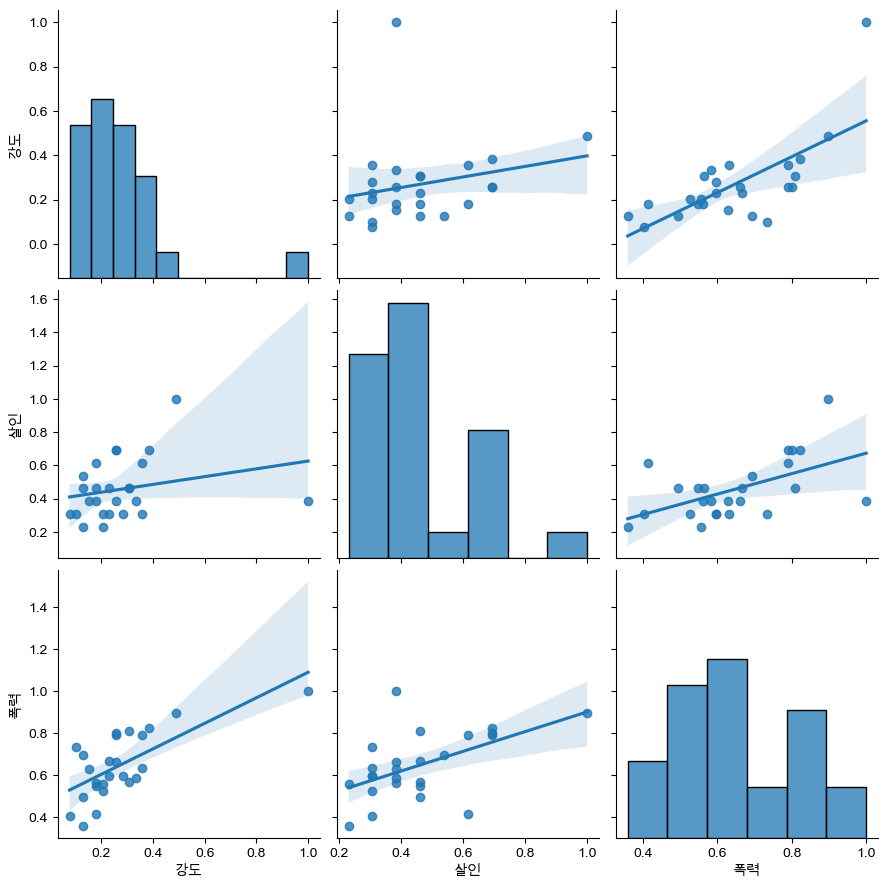

In [135]:
sns.pairplot(crime_anal_norm, 
             vars=['강도', '살인', '폭력'], 
             kind='reg', 
             size=3)

### 인구수, CCTV와 살인, 강도 관계 시각화

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


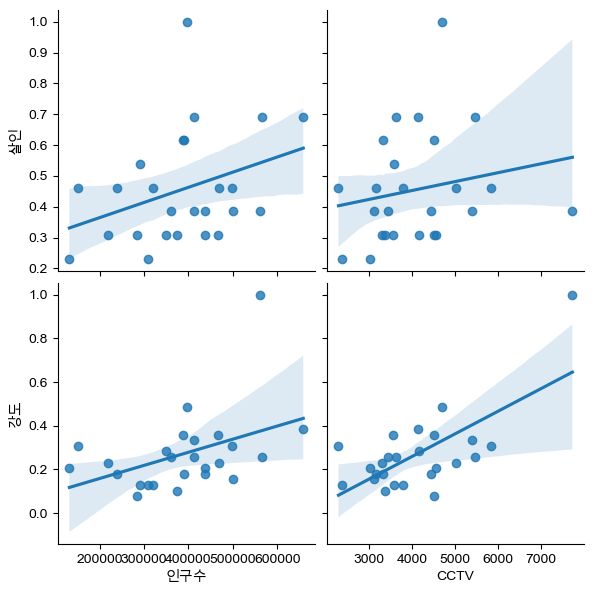

In [133]:
def drawPlot() :
    sns.pairplot(
        crime_anal_norm, 
        x_vars = ['인구수', 'CCTV'], 
        y_vars=['살인', '강도'],
        kind='reg',
        size=3
    )
    plt.show()

drawPlot()

### 인구수, CCTV와 살인/폭력 검거율의 관계 시각화

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


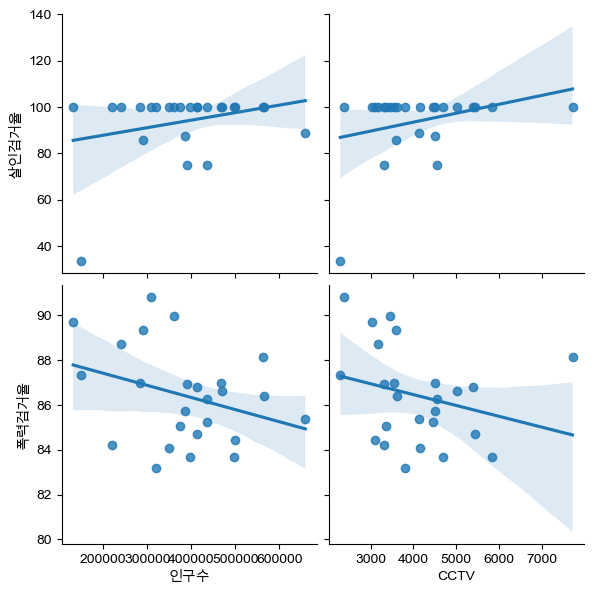

In [132]:
def drawPlot() :
    sns.pairplot(
        crime_anal_norm,
        x_vars=['인구수', 'CCTV'],
        y_vars=['살인검거율', '폭력검거율'],
        kind='reg',
        size=3
    )
    plt.show()

drawPlot()

### 인구수, CCTV와 절도/강도 검거율 관계 시각화

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


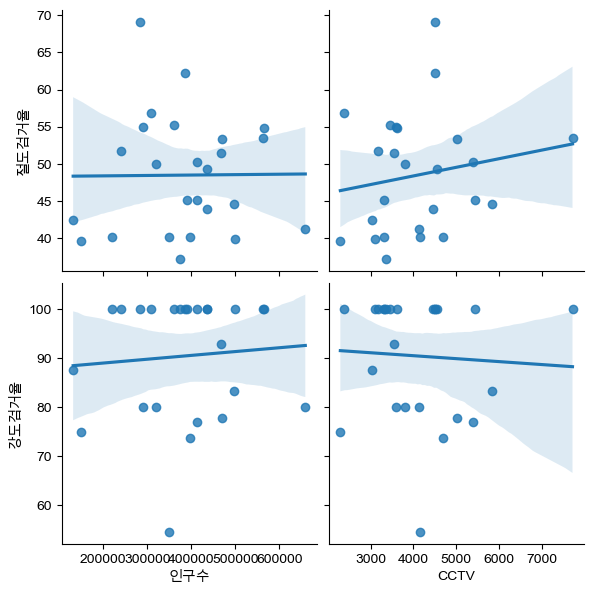

In [136]:
def drawPlot() :
    sns.pairplot(
        crime_anal_norm,
        x_vars=['인구수', 'CCTV'],
        y_vars=['절도검거율', '강도검거율'],
        kind='reg',
        size=3
    )
    plt.show()

drawPlot()

### 모든 검거율을 heatmap으로 시각화

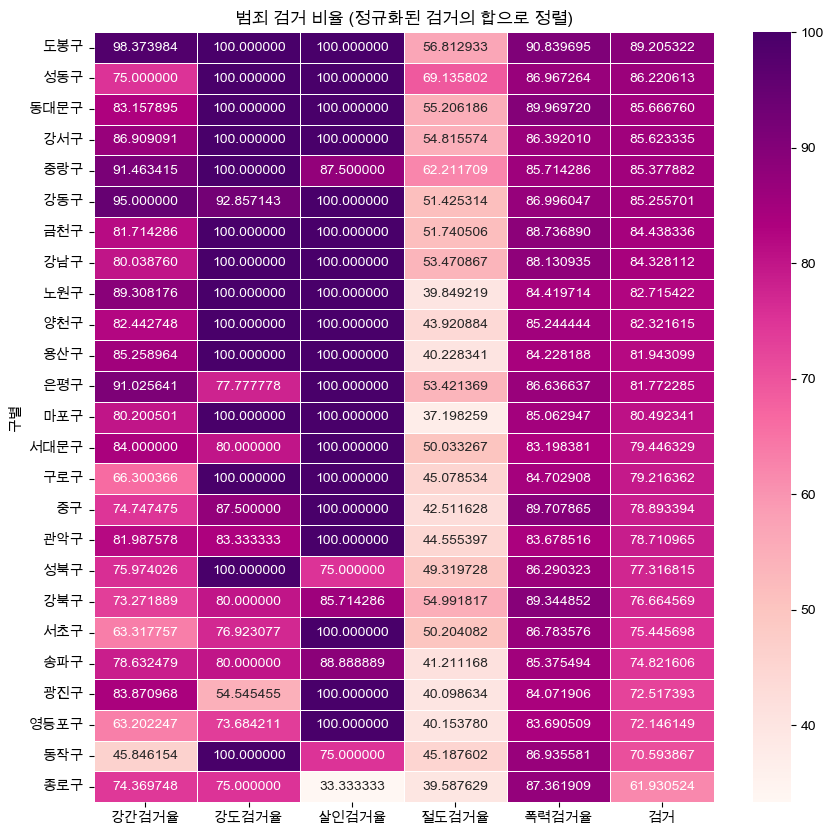

In [137]:
def drawGraph() :
    # 데이터프레임 생성
    target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']

    crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)  #내림차순 정렬

    # 데이터 시각화
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        crime_anal_norm_sort[target_col],
        annot=True,
        fmt='f',    # 데이터 실수형으로 표현
        linewidths=0.5, # 간격 설정
        cmap='RdPu'
    )
    plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
    plt.show()

drawGraph()

### 범죄 발생 건수로 heatmap 시각화

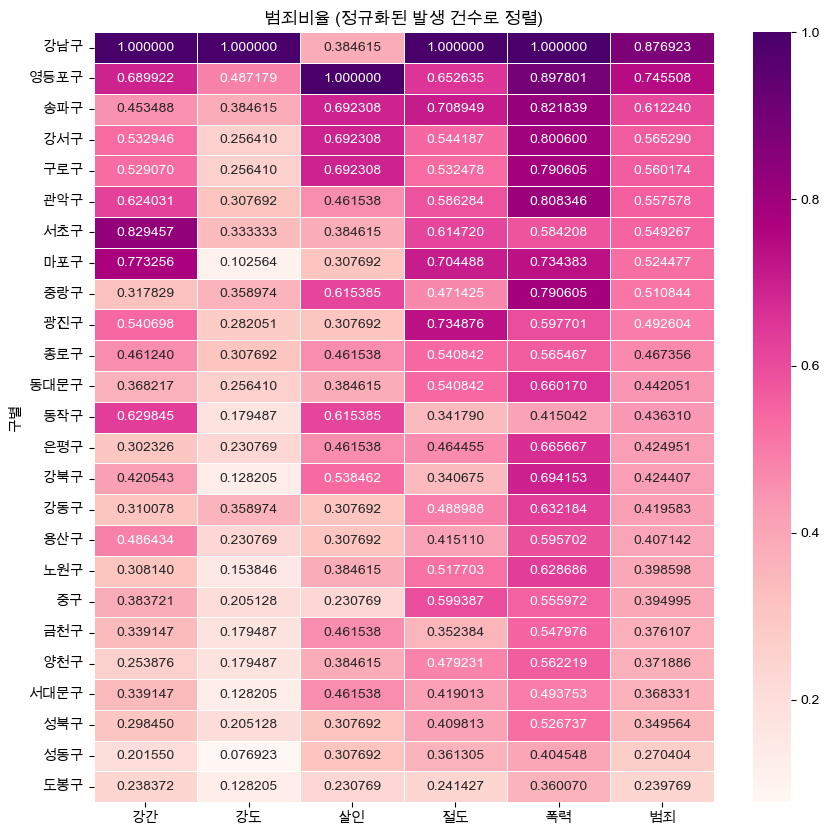

In [138]:
def drawGraph() :
    target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

    crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

    plt.figure(figsize=(10,10))
    sns.heatmap(
        crime_anal_norm_sort[target_col],
        annot=True,
        fmt='f',
        linewidths=0.5,
        cmap='RdPu'
    )
    plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
    plt.show()

drawGraph()

- heatmap으로 확인했을 때, 강남 3구(강남구, 송파구, 서초구)의 검거율은 낮은 반면 범죄비율은 높은 것으로 확인되었다.

### 데이터 저장

In [139]:
crime_anal_norm.to_csv('../data/data02/02. crime_in_Seoul_final.csv', sep=',', encoding='utf-8')

---
## 9. Folium 지도 시각화
- 지도시각화에 필요한 json파일 출처 : https://github.com/southkorea/southkorea-maps

### json 파일 불러오기

In [157]:
import json

crime_anal_norm = pd.read_csv(
    '../data/data02/02. crime_in_Seoul_final.csv',
    index_col=0,
    encoding='utf-8'
)

geo_path = '../data/data02/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

### folium을 통한 지도 시각화

In [217]:
# 살인 발생 건수 시각화
import folium

my_map = folium.Map(location=[37.5502, 126.982],
                    zoom_start=11,
                    tiles='Cartodb Positron'
                    )

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm['살인'],
    columns=[crime_anal_norm.index, crime_anal_norm['살인']],
    fill_color = 'PuRd',
    key_on='feature.id',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = '정규화된 살인 발생 건수'
).add_to(my_map)

my_map

### 강간 발생 건수 지도 시각화

In [218]:
my_map = folium.Map(location=[37.5502, 126.982],
                    zoom_start=11,
                    tiles='Cartodb Positron'
                    )

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm['강간'],
    columns=[crime_anal_norm.index, crime_anal_norm['강간']],
    key_on='feature.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='정규화된 강간 발생 건수'
).add_to(my_map)

my_map

### 5대 범죄 발생 건수(범죄 평균) 지도 시각화

In [219]:
my_map = folium.Map(location=[37.5502, 126.982],
                    zoom_start=11,
                    tiles='Cartodb Positron'
                    )

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm['범죄'],
    columns=[crime_anal_norm.index, crime_anal_norm['범죄']],
    key_on='feature.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='정규화된 5대 범죄 발생 건수(평균)'
).add_to(my_map)

my_map

### 인구 대비 범죄 발생 건수 지도 시각화

In [169]:
tmp_criminal = crime_anal_norm['범죄'] / crime_anal_norm['인구수']

my_map = folium.Map(location=[37.5502, 126.982],
                    zoom_start=11,
                    tiles='Cartodb Positron'
                    )

folium.Choropleth(
    geo_data=geo_str,
    data=tmp_criminal,
    columns=[crime_anal_norm.index, tmp_criminal],
    key_on='feature.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='인구 대비 범죄 발생 건수'
).add_to(my_map)

my_map

### 위도, 경도값을 활용한 경찰서 위치 마커 표시

In [170]:
crime_anal_station = pd.read_csv(
    '../data/data02/02. crime_in_Seoul_raw.csv',
    encoding='utf-8'
)

crime_anal_station.head()

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
0,강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
1,강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
2,강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637197,127.027305
3,강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.551362,126.850280
4,관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474395,126.951349


In [176]:
# 검거 컬럼 생성
# 검거 컬럼 값 = (죄종 별 검거 건수 / 죄종 별 검거 건수의 최댓값)의 평균값

col = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
tmp = crime_anal_station[col] / crime_anal_station[col].max()   #정규화 0 ~ 1

crime_anal_station['검거'] = np.mean(tmp, axis=1)
crime_anal_station.tail()

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng,검거
26,종로,113.0,137.0,3.0,6.0,0.0,4.0,389.0,952.0,1135.0,1291.0,종로구,37.571824,126.984153,0.238103
27,종암,42.0,51.0,5.0,5.0,1.0,2.0,344.0,680.0,815.0,932.0,성북구,37.603989,127.039937,0.195242
28,중랑,150.0,164.0,14.0,14.0,7.0,8.0,1052.0,1691.0,2712.0,3164.0,중랑구,37.605643,127.076487,0.675873
29,중부,96.0,141.0,3.0,3.0,2.0,2.0,485.0,1204.0,1164.0,1335.0,중구,37.559904,126.979491,0.277182
30,혜화,64.0,101.0,6.0,6.0,2.0,2.0,379.0,988.0,842.0,972.0,종로구,37.571968,126.998957,0.240065


In [220]:
# 경찰서 위치 마커 표시

my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=11
)

for idx, rows in crime_anal_station.iterrows():
    folium.Marker(
        location=[rows['lat'], rows['lng']]
    ).add_to(my_map)

my_map

### 검거율에 따른 circle marker 시각화
- 각 검거 값에 특정 값을 곱한 뒤 원의 넓이 적용

In [221]:
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=11
)

# 경계선 구분
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm['범죄'],
    columns=[crime_anal_norm.index, crime_anal_norm['범죄']],
    key_on='feature.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2
).add_to(my_map)

for idx, rows in crime_anal_station.iterrows():
    folium.CircleMarker(
        location=[rows['lat'], rows['lng']],
        radius=rows['검거'] * 50,
        popup=rows['구분'] + " : " + "%.2f" % rows['검거'],
        color='#3186cc',
        fill_color='#3186cc'
    ).add_to(my_map)

my_map

---
## [추가 분석]. 서울시 범죄 현황 장소별 분석
- 데이터 : 02.crime_in_Seoul_location.csv 활용
- 강남의 범죄 발생이 많은 것은 유흥업소의 밀집과 관련이 있지 않을까?

### 데이터 읽어오기

In [204]:
crime_loc_raw = pd.read_csv(
    '../data/data02/02. crime_in_Seoul_location.csv',
    thousands=',',
    encoding='euc-kr'
)

crime_loc_raw.head()

,범죄명,장소,발생건수
0,살인,"아파트, 연립 다세대",12
1,살인,단독주택,30
2,살인,노상,22
3,살인,상점,1
4,살인,"숙박업소, 목욕탕",4


In [205]:
crime_loc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄명     65 non-null     object
 1   장소      65 non-null     object
 2   발생건수    65 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [206]:
crime_loc_raw['범죄명'].unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [207]:
crime_loc_raw['장소'].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

### 데이터 정리하기 (pivot_table)
- index : 장소
- columns : 범죄명

In [208]:
crime_loc = crime_loc_raw.pivot_table(
    crime_loc_raw,
    index=['장소'],
    columns=['범죄명'],
    aggfunc=[np.sum]
)

crime_loc.head()

sum                      
      발생건수                      
범죄명  강간.추행  강도  살인     절도     폭력
장소                              
교통수단   691   0   0    457    222
금융기관     2   1   1   1081     42
기타    2128  67  65  21734  26382
노상     986  87  22   9329  24535
단독주택   395  15  30   2241   3579

In [209]:
# column 정리
crime_loc.columns = crime_loc.columns.droplevel([0, 1])
crime_loc.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,691,0,0,457,222
금융기관,2,1,1,1081,42
기타,2128,67,65,21734,26382
노상,986,87,22,9329,24535
단독주택,395,15,30,2241,3579


### 데이터 정규화

In [210]:
col = ['살인', '강도', '강간', '절도', '폭력']
crime_loc_norm = crime_loc / crime_loc.max()
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592
기타,1.000000,0.770115,1.000000,1.000000,1.000000
노상,0.463346,1.000000,0.338462,0.429235,0.929990
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661


In [211]:
crime_loc_norm['종합'] = np.mean(crime_loc_norm, axis=1)
crime_loc_norm.tail()

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
"아파트, 연립 다세대",0.133459,0.206897,0.184615,0.069200,0.107611,0.140356
"역, 대합실",0.085056,0.000000,0.000000,0.016380,0.010310,0.022349
유원지,0.027726,0.022989,0.030769,0.016886,0.016072,0.022888
유흥 접객업소,0.187030,0.149425,0.123077,0.093632,0.100258,0.130684
학교,0.015508,0.000000,0.000000,0.018404,0.007695,0.008321


### heatmap 시각화

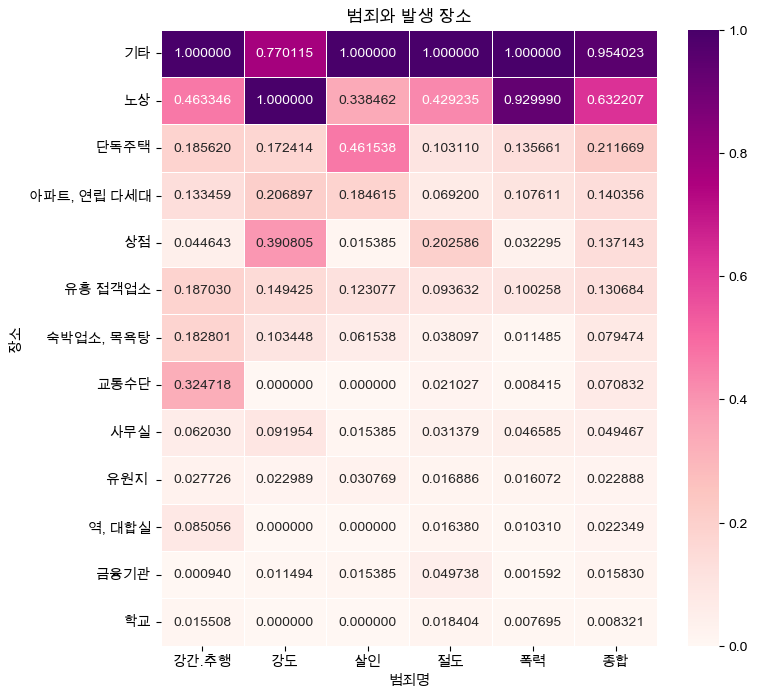

In [213]:
def drawGraph() :
    crime_loc_norm_sort = crime_loc_norm.sort_values(by='종합', ascending=False)

    plt.figure(figsize=(8,8))
    sns.heatmap(
        crime_loc_norm_sort,
        annot=True,
        fmt='f',
        linewidths=0.5,
        cmap='RdPu'
    )
    plt.title('범죄와 발생 장소')
    plt.show()

drawGraph()